In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [132]:
file = "Resource/globalterrorism.csv"
gtd= pd.read_csv(file,encoding="ISO-8859-1")
gtd.head()
gtd.count()
gtddf = terrorism.dropna(how='any')
gtddf.count()
gtddf.dtypes
gtddf['success'] = pd.to_numeric(terrorismdf['success'])

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Attacks by Region, City, and Country

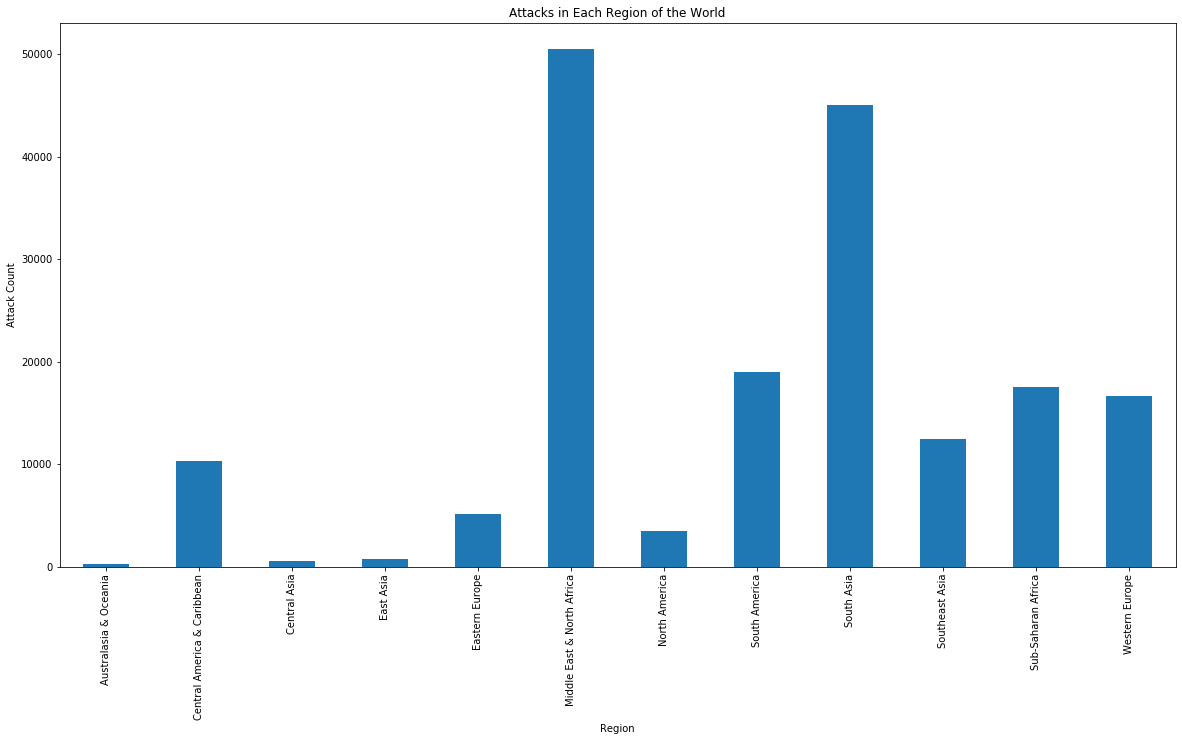

In [133]:
#attacks by region, city, country
#Number of Region Attacks
region = gtd.groupby("region_txt")
regionyear = region["iyear"]
total = len(gtd)
regionyears = regionyear.count()
regionyears.plot(kind="bar", figsize=(20,10))
plt.title("Attacks in Each Region of the World")
plt.xlabel("Region")
plt.ylabel("Attack Count")
plt.show()






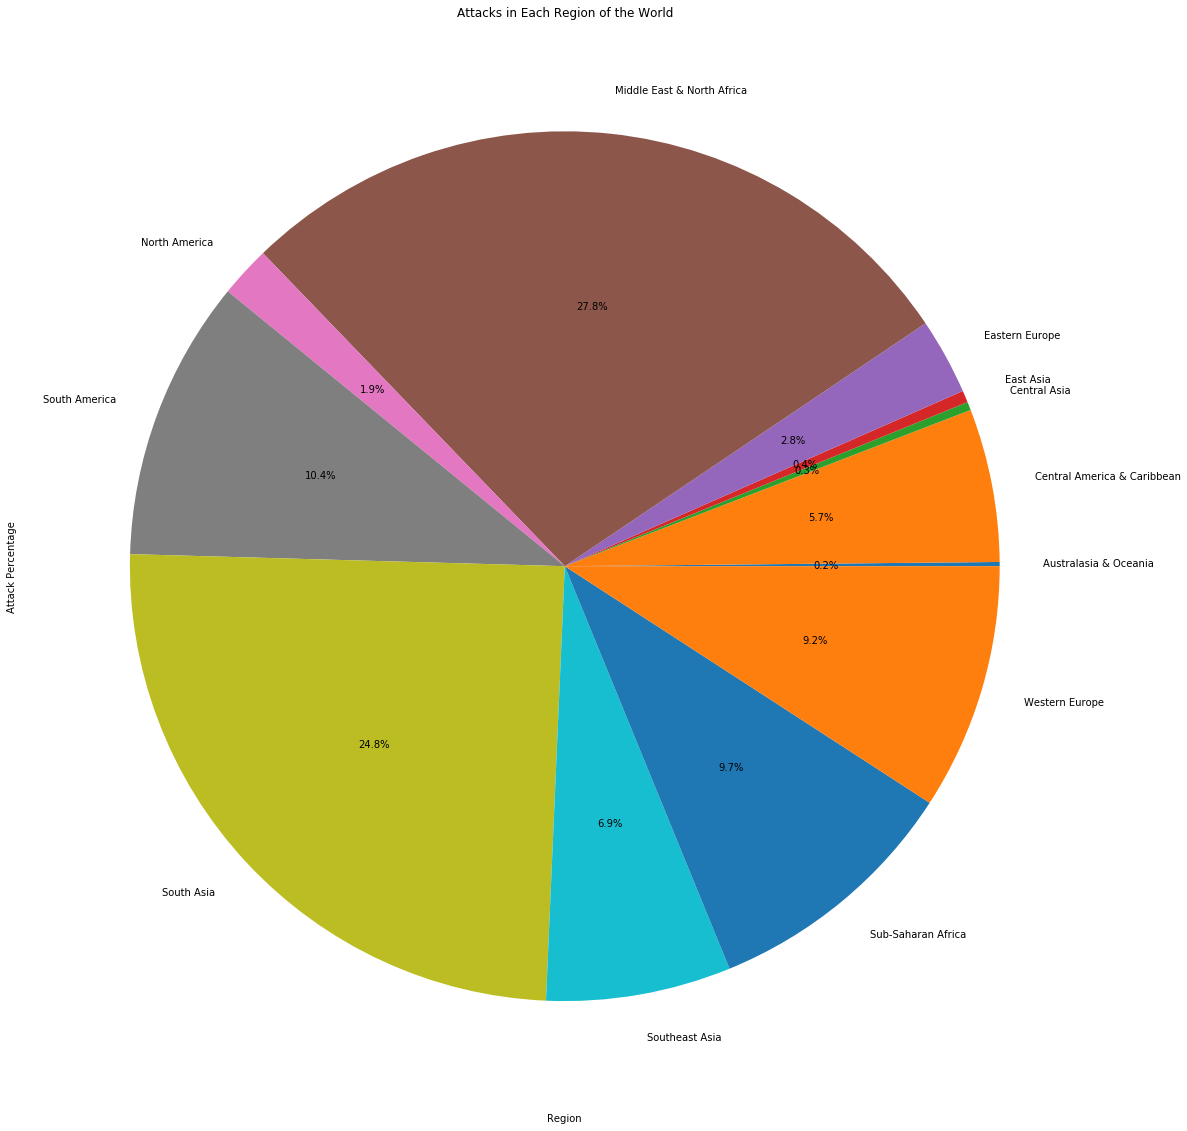

In [134]:
#percent of attacks in each region
percentages = regionyears/total * 100
percentages
percentages.plot(kind="pie",autopct="%1.1f%%", figsize=(20,20))
plt.title("Attacks in Each Region of the World")
plt.xlabel("Region")
plt.ylabel("Attack Percentage")
plt.show()

Text(0, 0.5, 'Attack Percent')

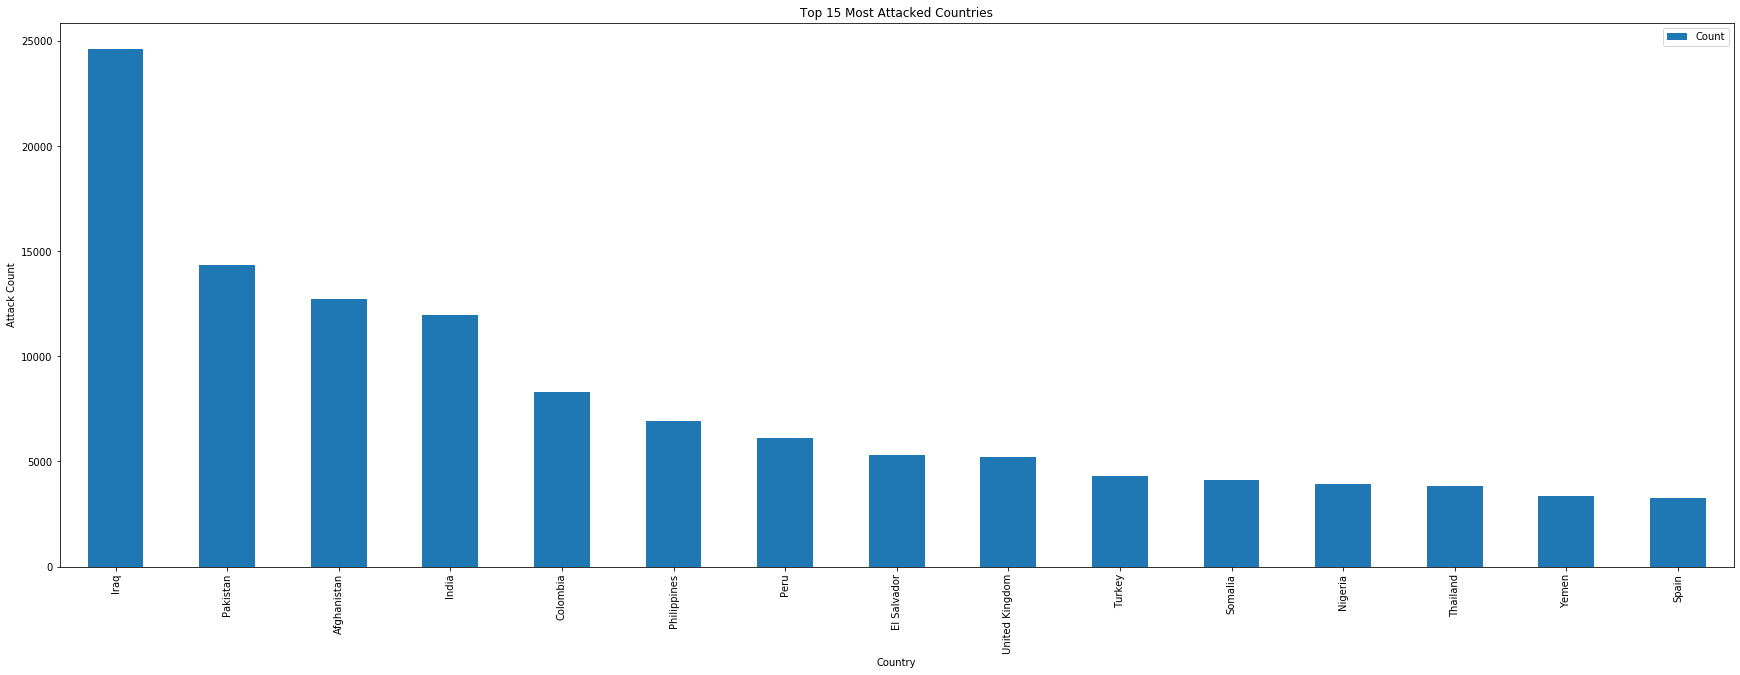

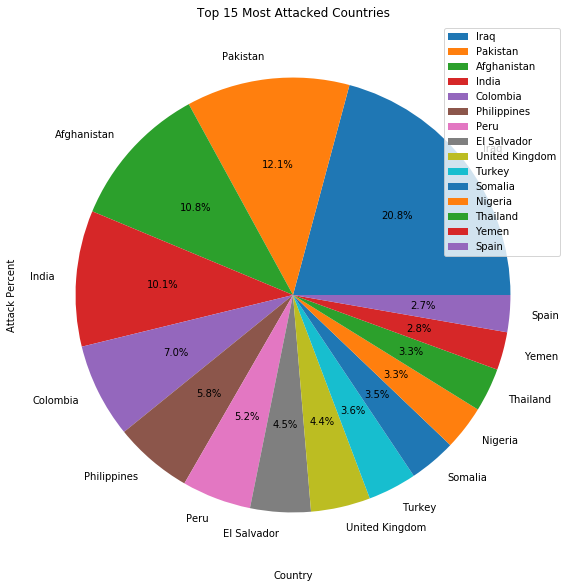

In [135]:
#number of ccountry attacks
country = gtd.groupby("country_txt")["region_txt"].count()

countryattacks = pd.DataFrame({"Count":country})
countryatt = countryattacks.nlargest(15,'Count')
countryatt
countryatt.plot(kind="bar", figsize=(30,10))
plt.title("Top 15 Most Attacked Countries")
plt.xlabel("Country")
plt.ylabel("Attack Count")
countryatt.plot(kind="pie",subplots = True,autopct="%1.1f%%", figsize=(30,10))
plt.title("Top 15 Most Attacked Countries")
plt.xlabel("Country")
plt.ylabel("Attack Percent")

Text(0, 0.5, 'Attack Percent')

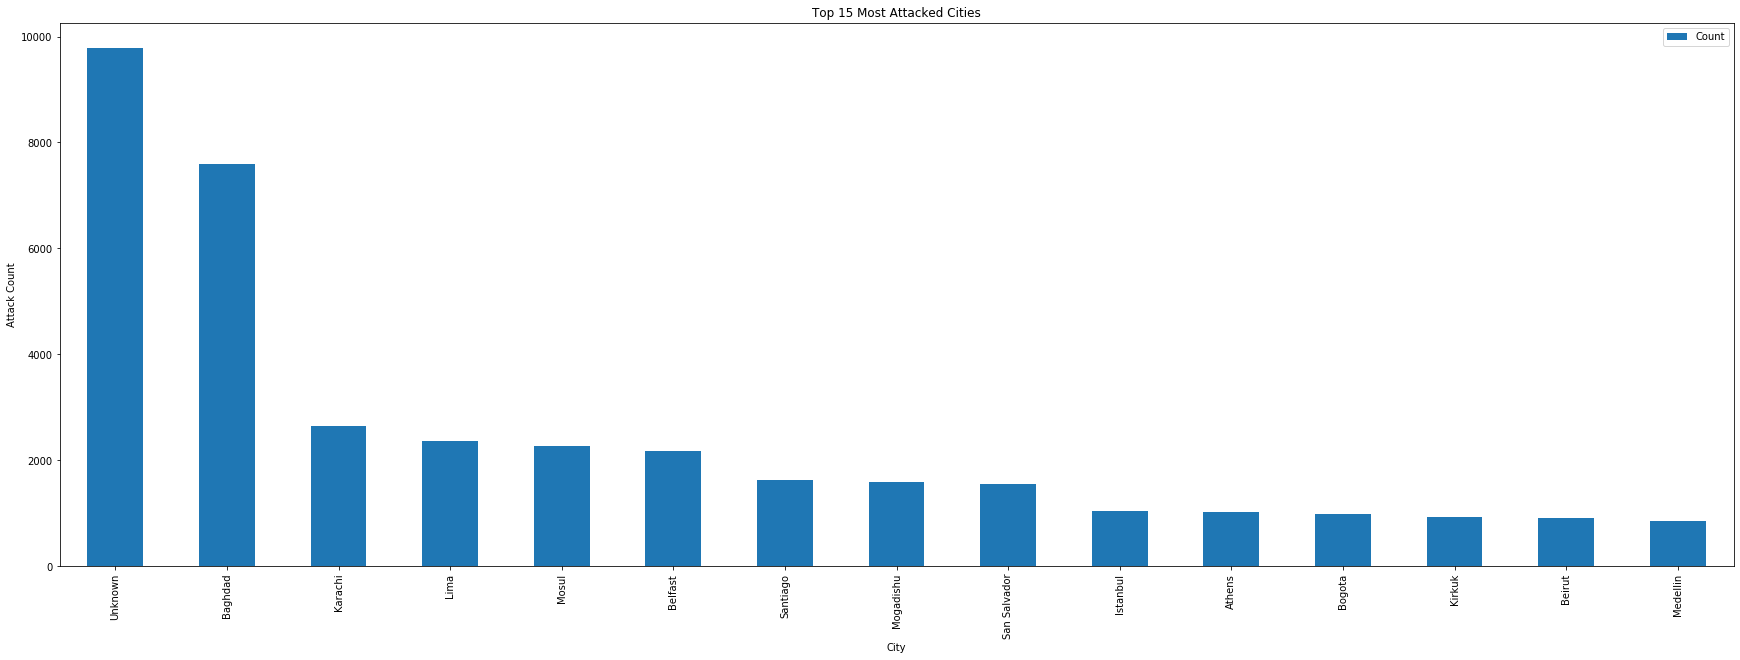

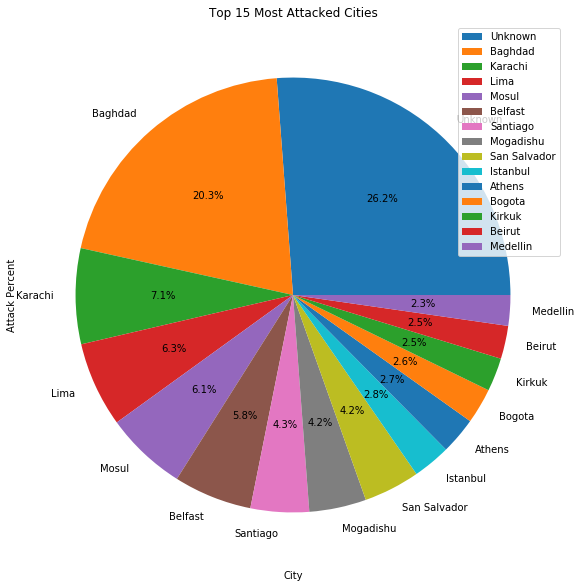

In [136]:
#number of city attacks
city = gtd.groupby("city")["region_txt"].count()
cityattacks = pd.DataFrame({"Count":city})
cityatt = cityattacks.nlargest(15,'Count')
cityatt.plot(kind="bar", figsize=(30,10))
plt.title("Top 15 Most Attacked Cities")
plt.xlabel("City")
plt.ylabel("Attack Count")
cityatt.plot(kind="pie",subplots = True,autopct="%1.1f%%", figsize=(30,10))
plt.title("Top 15 Most Attacked Cities")
plt.xlabel("City")
plt.ylabel("Attack Percent")

## Success Rate of Attacks in each Region

Text(0, 0.5, 'Success Count')

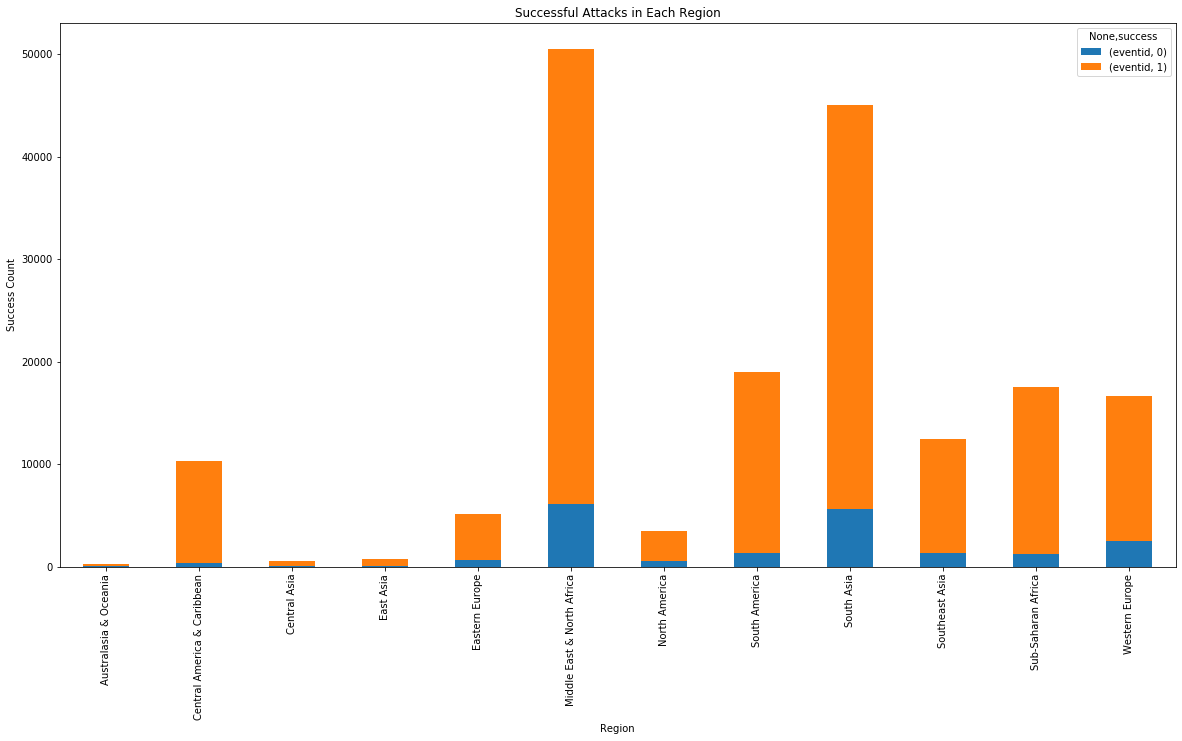

In [137]:
#success rate by region
regionsuccess = pd.DataFrame(gtd,columns = ["region_txt","success","eventid"])
newdf = regionsuccess.groupby(["region_txt","success"]).count()
newdf.reset_index(inplace = True)
regionsuccessgraph = newdf.groupby(["region_txt","success"]).max().unstack().plot(kind = "bar",stacked = True, figsize = (20,10))
plt.title("Successful Attacks in Each Region")
plt.xlabel("Region")
plt.ylabel("Success Count")

Text(0, 0.5, 'Success Percent')

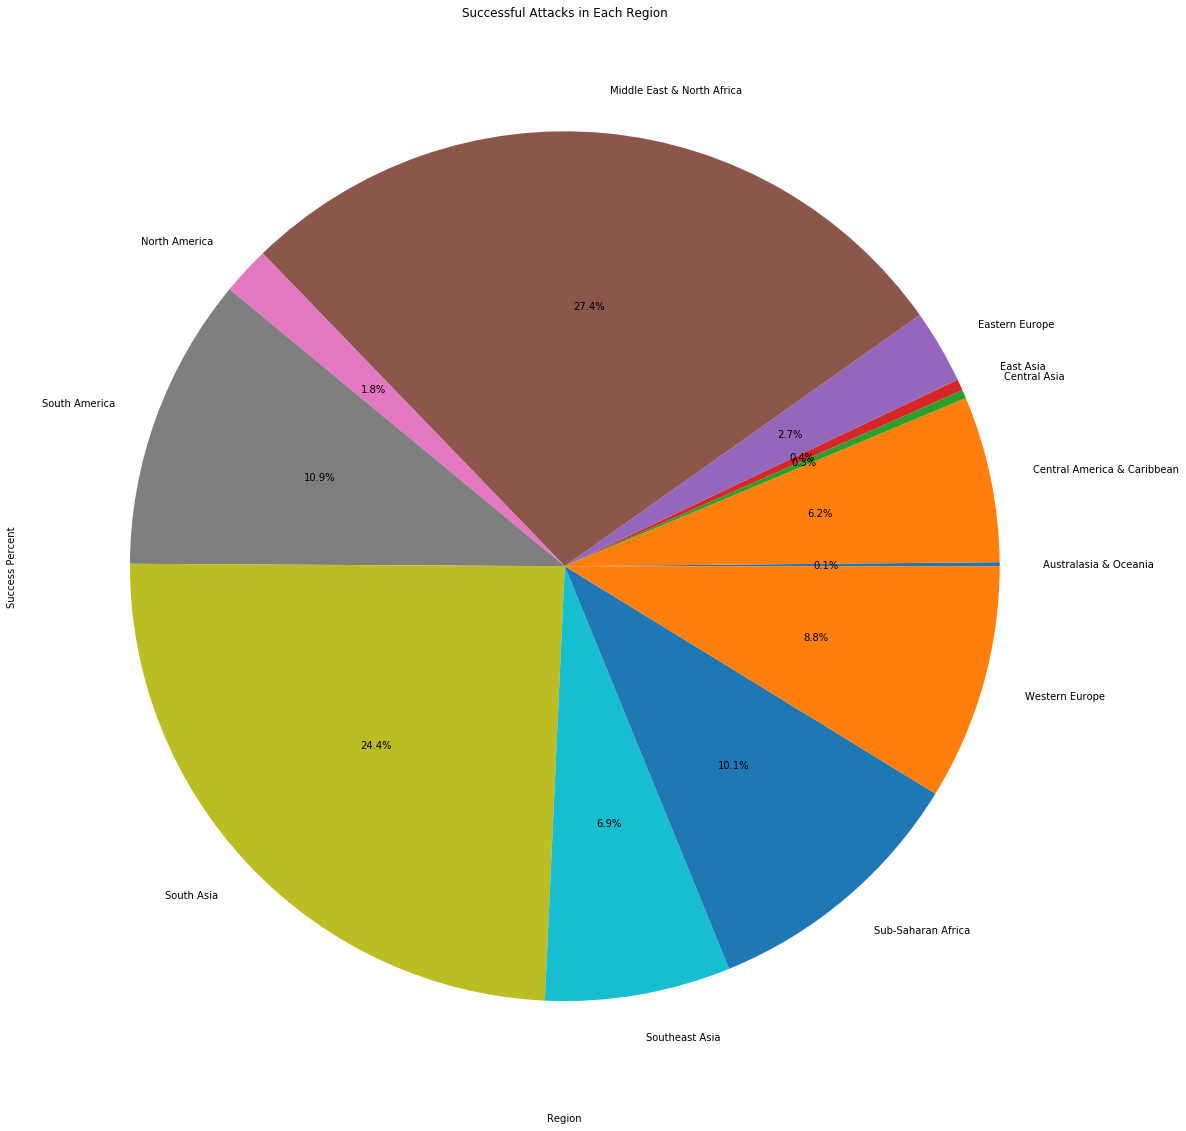

In [138]:
successpie = gtd.groupby("region_txt")["success"]
successpie.count()
regionsuccessgraph = successpie.sum()
pie = regionsuccessgraph.plot(kind="pie",autopct="%1.1f%%", figsize=(20,20))
plt.title("Successful Attacks in Each Region")
plt.xlabel("Region")
plt.ylabel("Success Percent")

## Attack of Terrorism or not? Doubt

Text(0, 0.5, 'Doubt Count')

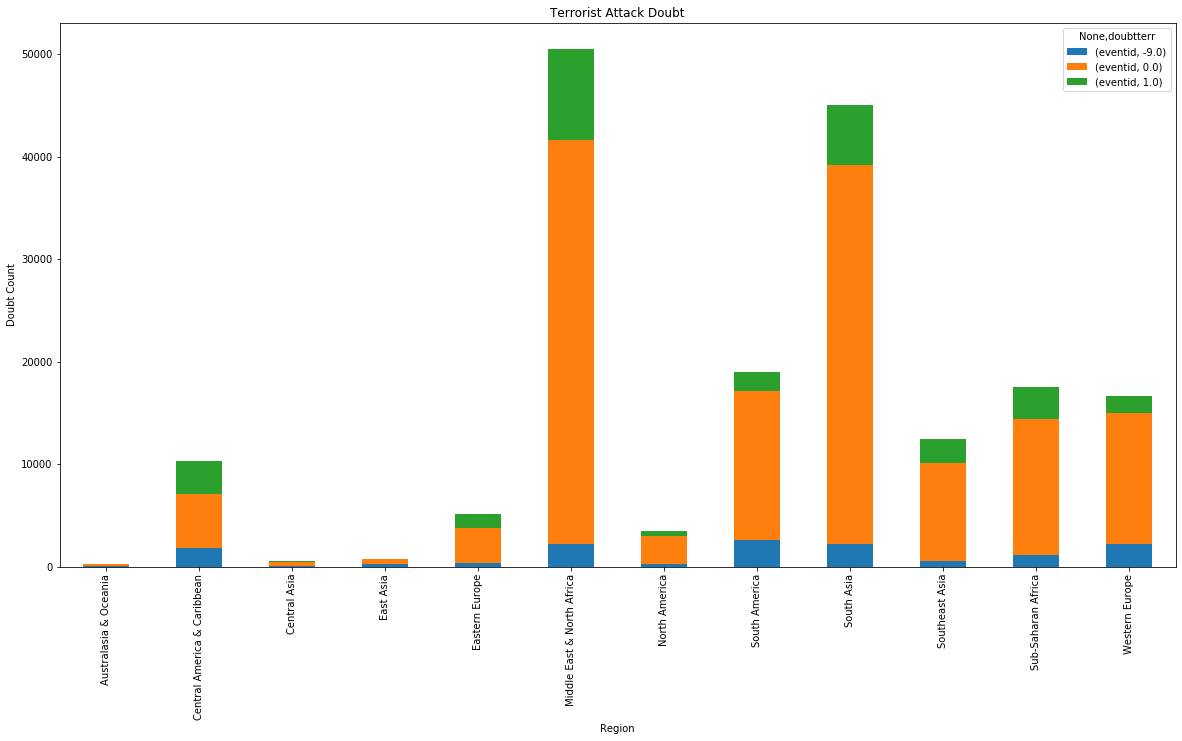

In [139]:
#regional Doubt which region has the most doubt
regiondoubt = gtd.groupby("doubtterr")["region_txt"]
regiondoubts = regiondoubt.count()
newdf = pd.DataFrame(gtd,columns = ["region_txt","doubtterr","eventid"])
doubtbyregion = newdf.groupby(["region_txt","doubtterr"]).count()
doubtbyregion.reset_index(inplace = True)
regiondoubtgraph = doubtbyregion.groupby(["region_txt","doubtterr"]).max().unstack().plot(kind = "bar",stacked = True, figsize = (20,10))
plt.title("Terrorist Attack Doubt")
plt.xlabel("Region")
plt.ylabel("Doubt Count")                                                                                      
#split into 0's and 1's
#counts = terrorism.groupby("region")["doubtterr"]
#doubtbyregion = pd.DataFrame({"Region":counts})
#newdf = doubtbyregion.applymap(lambda x: x[0] if isinstance(x, list) else x)
#print(newdf)
#regiondoubts/total * 100
#print(doubtbyregion.sum())
#doubtbyregion.plot(kind="bar", figsize=(20,10))

Text(0, 0.5, 'Attack Count')

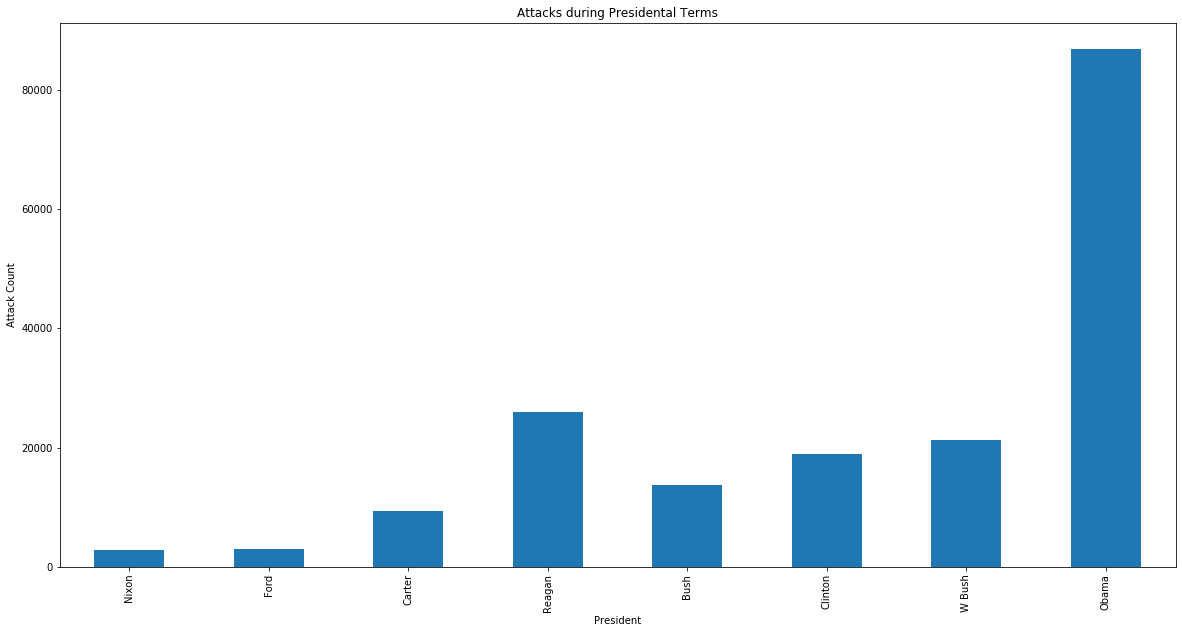

In [140]:
#comparasion to US presidents
term = [1969,1974,1977,1981,1989,1993,2001,2009,2017]
president = ["Nixon","Ford","Carter","Reagan","Bush","Clinton","W Bush","Obama"]
gtd["President"] = pd.cut(gtd["iyear"],term,labels = president)
presidentcount = gtd.groupby("President")["iyear"]
counts = presidentcount.count()
presidentbar = counts.plot(kind="bar", figsize=(20,10))
presidentdataframe = pd.DataFrame(gtd,columns = ["President","iyear",])
plt.title("Attacks during Presidental Terms")
plt.xlabel("President")
plt.ylabel("Attack Count")